# Финальная работа по базовому курсу

## 0. Импорт сторонних библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

## 1. Загрузка данных

Загрузим данные из файлов ga_sessions.csv и ga_hits.csv. Выведем размерность и первые 5 строчек данных.

In [2]:
df_1 = pd.read_csv('data/ga_sessions.csv')
df_1.shape

C:\Users\Alex\AppData\Local\Temp\ipykernel_8960\902769868.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv('data/ga_sessions.csv')


(1860042, 18)

In [3]:
df_1.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [4]:
df_2 = pd.read_csv('data/ga_hits.csv')
df_2.shape

(15726470, 11)

In [5]:
df_2.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


## 2. Data Preparation

Проверим количество уникальных значений в столбце session_id обоих датафреймов.

In [6]:
df_1.session_id.nunique()

1860042

In [7]:
df_2.session_id.nunique()

1734610

С учетом того, что дубликаты имеются только во втором датафрейме, удалим их.

In [8]:
df_2.drop_duplicates(subset='session_id', inplace=True)

In [9]:
df_2.shape

(1734610, 11)

Объединим оба датасета методом inner. Выведем размерность нового датафрейма.

In [10]:
df = pd.merge(df_1, df_2, how='inner', on='session_id')
df.shape

(1732266, 28)

Для увеличения скорости обработки скрипта в PyCharm создадим файл с объединенным датафреймом, который подадим на вход скрипта pipeline.py

In [ ]:
df.to_csv('data/df_merge.csv', index=False)

### 2.1. Data Cleaning

Выведем все признаки с пропущенными значениями и количество пропущенных значений

In [11]:
df.loc[:, df.isna().sum() > 0].isna().sum().sort_values(ascending=False)

event_value      1732266
device_model     1717204
utm_keyword      1020752
device_os        1013964
hit_time         1011967
hit_referer       674181
event_label       536565
device_brand      347196
utm_adcontent     304137
utm_campaign      195287
utm_source            76
dtype: int64

Удалим фичи, в которых доля пропусков более 30%

In [12]:
features_with_na = df.isna().sum()[df.isna().sum() > 0] / df.shape[0]
columns_to_drop = features_with_na[features_with_na > 0.3].index.tolist()
columns_to_drop

['utm_keyword',
 'device_os',
 'device_model',
 'hit_time',
 'hit_referer',
 'event_label',
 'event_value']

In [13]:
df.drop(columns_to_drop, axis=1, inplace=True)

Выведем оставшиеся фичи с пропусками

In [14]:
df.loc[:, df.isna().sum() > 0].isna().sum().sort_values(ascending=False)

device_brand     347196
utm_adcontent    304137
utm_campaign     195287
utm_source           76
dtype: int64

Заполним пропуски в фичах utm_campaign, device_brand и utm_adcontent значением other.

In [15]:
df['utm_campaign'].fillna('other', inplace=True)
df['utm_adcontent'].fillna('other', inplace=True)
df['device_brand'].fillna('other', inplace=True)

Удалим 76 строк с пропущенным значением в фиче 'utm_source'.

In [16]:
df.dropna(subset='utm_source', inplace=True)
df.shape

(1732190, 21)

In [17]:
df.loc[:, df.isna().sum() > 0].isna().sum().sort_values(ascending=False)

Series([], dtype: float64)

Теперь пропуски в датасете отсутствуют.

С учетом того, что большинство признаков в нашем датасете категориальные, выведем по ним сводную таблицу.

In [18]:
df.describe(include='object')

,session_id,client_id,visit_date,visit_time,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,hit_date,hit_type,hit_page_path,event_category,event_action
count,1732190,1.732190e+06,1732190,1732190,1732190,1732190,1732190,1732190,1732190,1732190,1732190,1732190,1732190,1732190,1732190,1732190,1732190,1732190,1732190
unique,1732190,1.320696e+06,226,85031,280,51,407,281,3,201,4947,55,159,2389,226,1,209094,38,172
top,9055434745589932991.1637753792.1637753792,1.750498e+09,2021-05-24,13:00:00,ZpYIoDJMcFzVoPFsHGJL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,414x896,Chrome,Russia,Moscow,2021-05-24,event,podpiska.sberauto.com/,sub_page_view,sub_landing
freq,1,4.490000e+02,39230,58044,552555,525206,422965,935368,1368651,503526,155137,951511,1682347,750873,39230,1732190,924921,862663,844657


### 2.2. Data Transformation

Преобразуем целевую переменную в числовой тип для оценки корреляции целевого действия с нашими признаками. Если произошло целевое действие на сайте, тогда эти значения заменим на 1, в противном случае на 0.

In [19]:
target_values = [
    'sub_car_claim_click',
    'sub_car_claim_submit_click',
    'sub_open_dialog_click',
    'sub_custom_question_submit_click',
    'sub_call_number_click',
    'sub_callback_submit_click',
    'sub_submit_success',
    'sub_car_request_submit_click',
    ]

df['event_action'] = df['event_action'].apply(lambda x: 1 if x in target_values else 0)

df.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,...,device_screen_resolution,device_browser,geo_country,geo_city,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,360x720,Chrome,Russia,Zlatoust,2021-11-24,3,event,podpiska.sberauto.com/,sub_page_view,0
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,...,385x854,Samsung Internet,Russia,Moscow,2021-11-14,3,event,podpiska.sberauto.com/,sub_page_view,0
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,360x720,Chrome,Russia,Krasnoyarsk,2021-12-28,10,event,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,0
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,other,NOBKLgtuvqYWkXQHeYWM,mobile,...,393x786,Chrome,Russia,Moscow,2021-05-29,2,event,podpiska.sberauto.com/,sub_page_view,0
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,other,other,mobile,...,393x786,Chrome,Russia,Moscow,2021-05-29,3,event,sberauto.com/cars?city=1&rental_page=rental_on...,quiz,0


Посмотрим сколько примеров приходится на каждый класс целевой переменной.

In [20]:
df.event_action.value_counts()

event_action
0    1726961
1       5229
Name: count, dtype: int64

Датасет не сбалансирован. 

Преобразуем 'visit_date' и 'visit_time' в формат даты и времени.

In [21]:
df.visit_date = pd.to_datetime(df['visit_date'])
df.visit_time = pd.to_datetime(df['visit_time'])

C:\Users\Alex\AppData\Local\Temp\ipykernel_8960\378436092.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.visit_time = pd.to_datetime(df['visit_time'])


Преобразуем категориальные переменные utm_source и utm_medium в числовые. При этом реклама в соц.сетях и органический трафик примут значение 1, а остальные - значение 0.

In [22]:
utm_source_value = [
    'QxAxdyPLuQMEcrdZWdWb', 
    'MvfHsxITijuriZxsqZqt', 
    'ISrKoXQCxqqYvAZICvjs',
    'IZEXUFLARCUMynmHNBGo', 
    'PlbkrSYoHuZBWfYjYnfw',
    'gVRrcxiDQubJiljoTbGm'
]

df['utm_source_num'] = df['utm_source'].apply(lambda x: 1 if x in utm_source_value else 0)

utm_medium_value = [
    'organic',
    'referral',
    '(none)'
]

df['utm_medium_num'] = df['utm_medium'].apply(lambda x: 1 if x in utm_medium_value else 0)

Создадим дополнительные фичи из имеющихся

In [23]:
df['path_len'] = df.apply(lambda x: len(x.hit_page_path), axis=1)
df['month'] = df['visit_date'].dt.month
df['dayofweek'] = df['visit_date'].dt.weekday
df['hour'] = df['visit_time'].dt.hour
df['device_browser_short'] = df['device_browser'].apply(lambda x: x.split()[0].replace('.', ''))
df.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,...,hit_page_path,event_category,event_action,utm_source_num,utm_medium_num,path_len,month,dayofweek,hour,device_browser_short
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,2024-05-19 14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,podpiska.sberauto.com/,sub_page_view,0,0,0,22,11,2,14,Chrome
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,2024-05-19 08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,...,podpiska.sberauto.com/,sub_page_view,0,1,0,22,11,6,8,Samsung
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,2024-05-19 02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,0,0,0,212,12,1,2,Chrome
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,2024-05-19 05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,other,NOBKLgtuvqYWkXQHeYWM,mobile,...,podpiska.sberauto.com/,sub_page_view,0,0,0,22,5,5,5,Chrome
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,2024-05-19 05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,other,other,mobile,...,sberauto.com/cars?city=1&rental_page=rental_on...,quiz,0,0,0,79,5,5,5,Chrome


### 2.3. Feature Selection

Отобразим графически уникальные значения признаков.

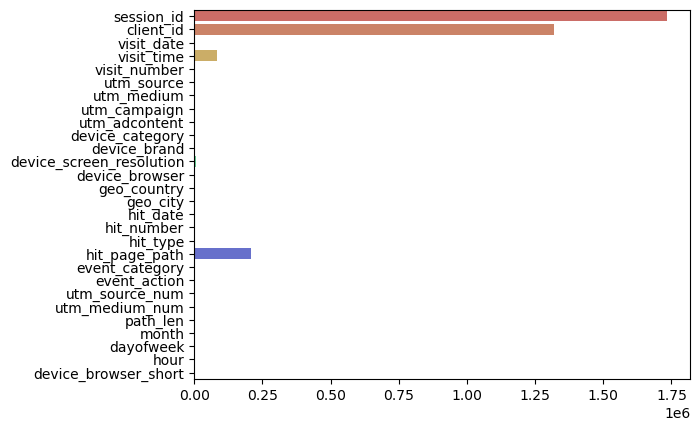

In [24]:
cols = df.columns
uniq = [len(df[col].unique()) for col in cols]
sns.barplot(x=uniq, y=cols, palette='hls')
plt.show()

Визуализируем матрицу корреляций числовых переменных с помощью heatmap

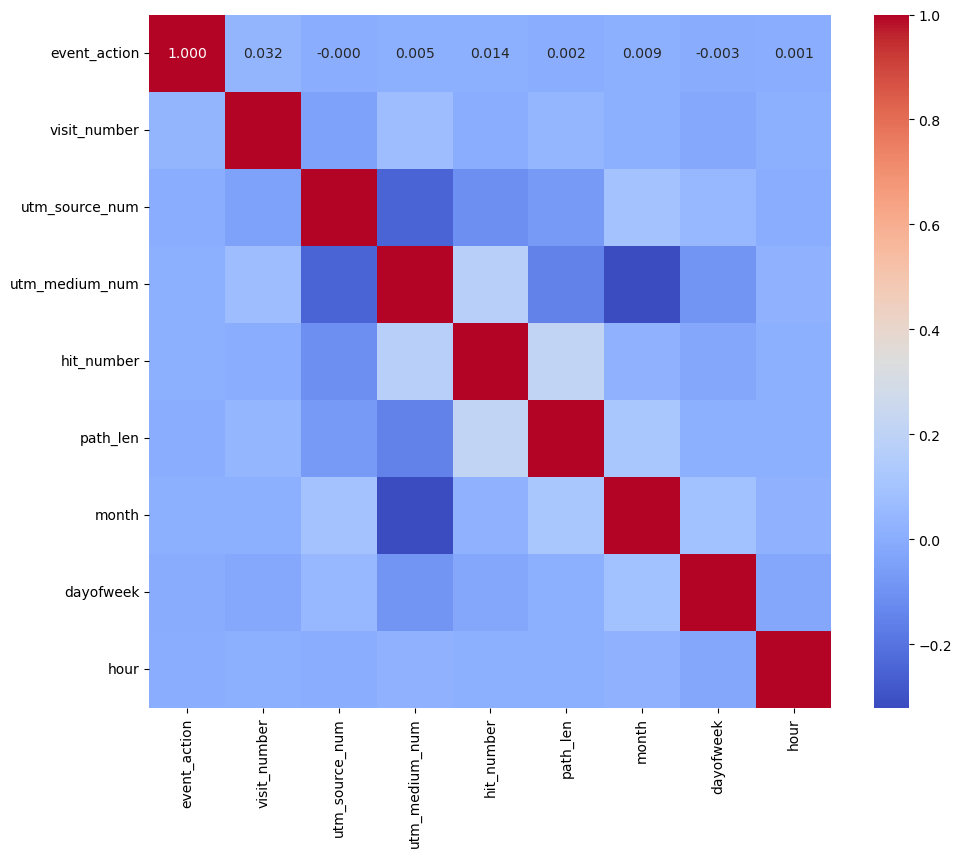

In [25]:
plt.figure(figsize=(11, 9))
sns.heatmap(df[['event_action', 'visit_number', 'utm_source_num', 'utm_medium_num', 
                'hit_number', 'path_len', 'month', 'dayofweek', 'hour']].corr(), 
            annot=True, 
            fmt='.3f', 
            cmap='coolwarm')
plt.show()

Отмечается отсутствие зависимости совершения целевого действия от органического и платного трафика utm_medium_num, а также от рекламы в соц.сетях utm_source_num.

Посмотрим на соотношение долей органического и платного трафика прицелевом действии и на всем датафрейме.

Из имеющегося датасета выделем отдельный датасет со значением целевой переменной равной 1 - целевое дествие совершено, Conversion Rate (CR).

In [26]:
df_cr = df[df.event_action == 1]
df_cr.shape

(5229, 28)

In [27]:
[df_cr.utm_source_num.value_counts()[1] / df_cr.shape[0], df.utm_source_num.value_counts()[1] / df.shape[0]]

[0.1476381717345573, 0.14795143719799791]

In [28]:
[df_cr.utm_medium_num.value_counts()[1] / df_cr.shape[0], df.utm_medium_num.value_counts()[1] / df.shape[0]]

[0.31057563587684067, 0.2707093332717542]

Как видно из получившихся списков реклама в соц.сетях utm_source_num не оказывает никакого влияния на совершение целевого действия.
А вот процентное соотношение органического трафика utm_medium_num немного влияет на совершение целевого действия, доля органического трафика на 4 процента выше в выборке с целевыми значениями.

Посмотрим на зависимость целевого действия от месяца посещения сайта.

In [29]:
data = df_cr.groupby('month')['event_action'].agg(count='count').reset_index().sort_values(by='month')
data

,month,count
0,5,86
1,6,97
2,7,571
3,8,701
4,9,934
5,10,943
6,11,905
7,12,992


Судя по динамике, о сезонности говорить нельзя, скорре всего имеющаяся статистика по тем либо иным причинам не собиралась ранее мая 2021 года и данные доступны тольео за 2021, поэтому выделить сезонность не получится. При этом, резкое увеличение в июле целевого действия может являть следствием изменения условий продукта в более выгодном направлении для клиента. Таким образом, фичу month считаю, что нужно удалить, чтобы не вносила дополнительную ошибку в предсказания целевого действия.

Посмотрим распределение по времени от всего датасета со всеми значениями целевой переменной.

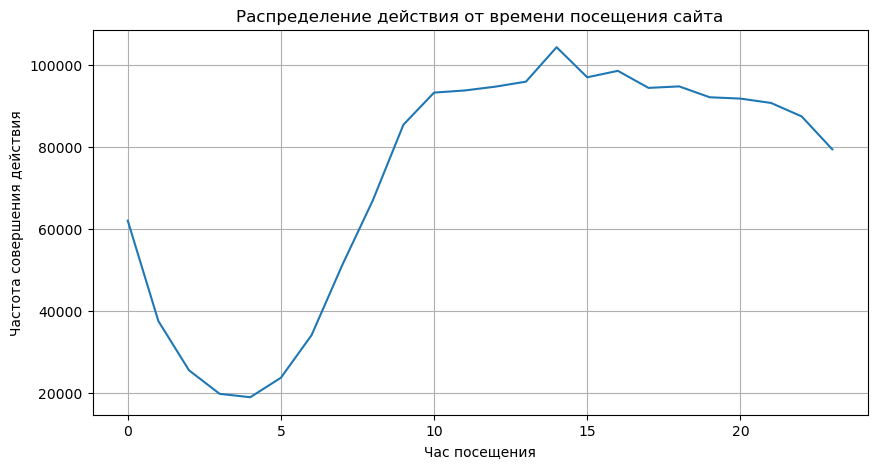

In [30]:
data = df.groupby('hour')['event_action'].agg(count='count').reset_index().sort_values(by='hour')
plt.figure(figsize=(10, 5))
plt.plot(data['hour'], data['count'])
plt.title('Распределение действия от времени посещения сайта')
plt.xlabel('Час посещения')
plt.ylabel('Частота совершения действия')
plt.grid()
plt.show()

Теперь посмотрим на зависимость целевого действия от времени посещения

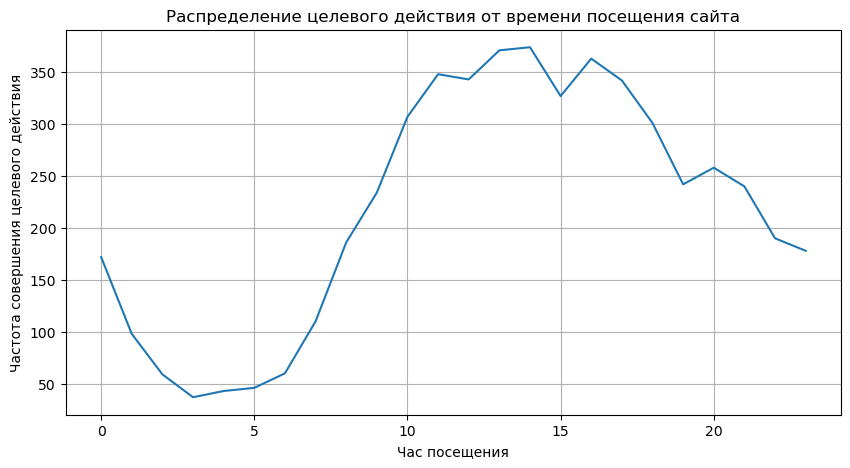

In [31]:
data = df_cr.groupby('hour')['event_action'].agg(count='count').reset_index().sort_values(by='hour')
plt.figure(figsize=(10, 5))
plt.plot(data['hour'], data['count'])
plt.title('Распределение целевого действия от времени посещения сайта')
plt.xlabel('Час посещения')
plt.ylabel('Частота совершения целевого действия')
plt.grid()
plt.show()

Из графика видна динамика, которую можно объяснить стандартным распорядком дня. Низкая активность в ночное время, связано со сном. Небольшой провал в 15:00, возможно связан с обедом. Небольшой провал в 19:00, когда люди едут домой и возможно не отвлекаются от дороги на посещение сайта и совершение активных действий.
Если сравнить данный график с посещением сайта в целом, то на распределение целевой переменной более заметен промежуток времени с совершением целевого действия в 13:00 и в 16:00.
В связи с этим фичу 'hour' будем использовать в модели предсказаний.

Проведем подобное исследование зависимости совершения целевого действия от дня недели.

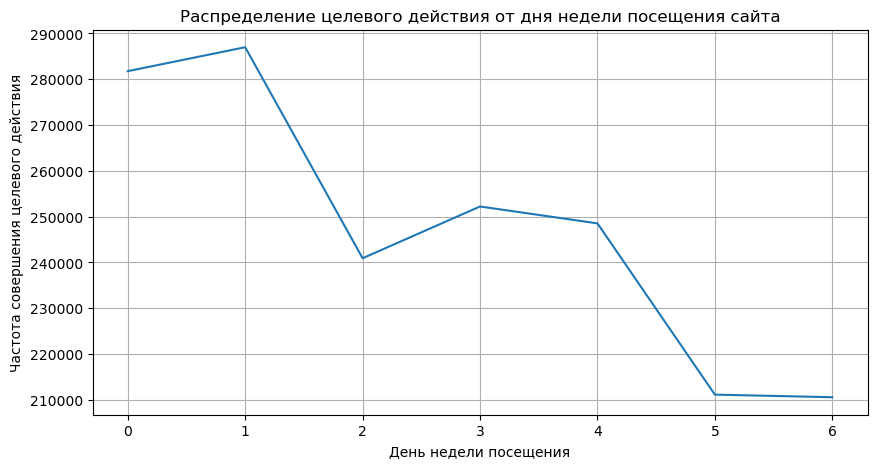

In [32]:
data = df.groupby('dayofweek')['event_action'].agg(count='count').reset_index().sort_values(by='dayofweek')
plt.figure(figsize=(10, 5))
plt.plot(data['dayofweek'], data['count'])
plt.title('Распределение целевого действия от дня недели посещения сайта')
plt.xlabel('День недели посещения')
plt.ylabel('Частота совершения целевого действия')
plt.grid()
plt.show()

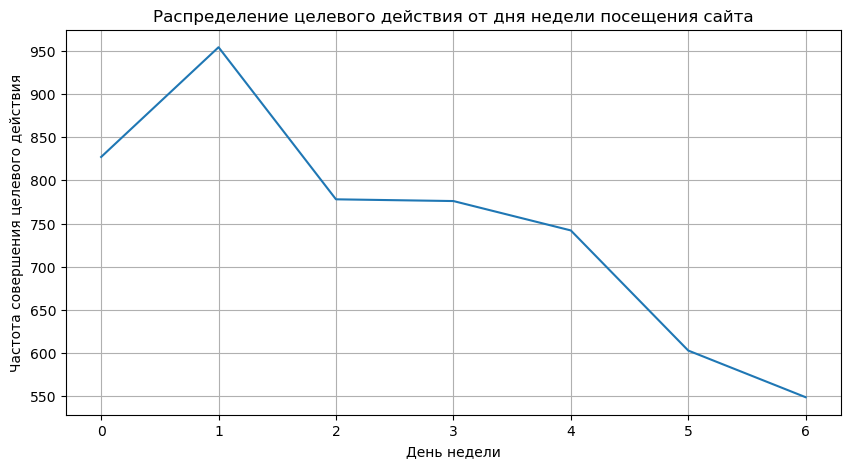

In [33]:
data = df_cr.groupby('dayofweek')['event_action'].agg(count='count').reset_index().sort_values(by='dayofweek')
plt.figure(figsize=(10, 5))
plt.plot(data['dayofweek'], data['count'])
plt.title('Распределение целевого действия от дня недели посещения сайта')
plt.xlabel('День недели')
plt.ylabel('Частота совершения целевого действия')
plt.grid()
plt.show()

Также заметно отличие в распределении по дням недели целевого действия и всех действий. Также попробует использовать фичу 'dayofweek' в модели предсказаний.

Посмотрим какие значения переменных больше всего присутствуют в выборке по совершению целевого действия. Затем вычислим долю и сравним с долей этого же значения в общей выборке. Тем самым выясним, какие именно значения оказывают влияние на целевую переменную

In [34]:
data = df_cr['utm_source'].value_counts().iloc[:10]
data

utm_source
ZpYIoDJMcFzVoPFsHGJL    1383
kjsLglQLzykiRbcDiGcD    1091
fDLlAcSmythWSCVMvqvL     808
MvfHsxITijuriZxsqZqt     595
BHcvLfOaCWvWTykYqHVe     409
bByPQxmDaMXgpHeypKSM     397
QxAxdyPLuQMEcrdZWdWb     141
aXQzDWsJuGXeBXexNHjc     123
jaSOmLICuBzCFqHfBdRg      53
ISrKoXQCxqqYvAZICvjs      19
Name: count, dtype: int64

In [35]:
data = pd.merge(df_cr['utm_source'].value_counts().iloc[:10] / df_cr.shape[0], 
                df['utm_source'].value_counts() / df.shape[0], 
                how='left', left_index=True, right_index=True)
data

,count_x,count_y
utm_source,,
ZpYIoDJMcFzVoPFsHGJL,0.264487,0.318992
kjsLglQLzykiRbcDiGcD,0.208644,0.141542
fDLlAcSmythWSCVMvqvL,0.154523,0.159948
MvfHsxITijuriZxsqZqt,0.113788,0.101508
BHcvLfOaCWvWTykYqHVe,0.078218,0.064059
bByPQxmDaMXgpHeypKSM,0.075923,0.052163
QxAxdyPLuQMEcrdZWdWb,0.026965,0.026133
aXQzDWsJuGXeBXexNHjc,0.023523,0.017047
jaSOmLICuBzCFqHfBdRg,0.010136,0.016331


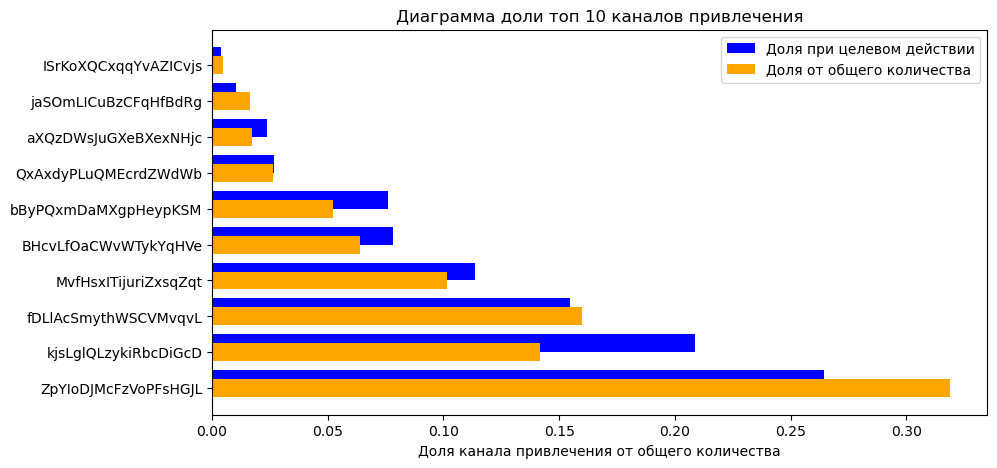

In [36]:
plt.figure(figsize=(10, 5))
plt.barh(data.index, data.count_x, 0.5, color='blue', align='edge')
plt.barh(data.index, data.count_y, 0.5, color='orange')
plt.title('Диаграмма доли топ 10 каналов привлечения')
plt.xlabel('Доля канала привлечения от общего количества')
plt.legend(['Доля при целевом действии', 'Доля от общего количества'])
plt.show()

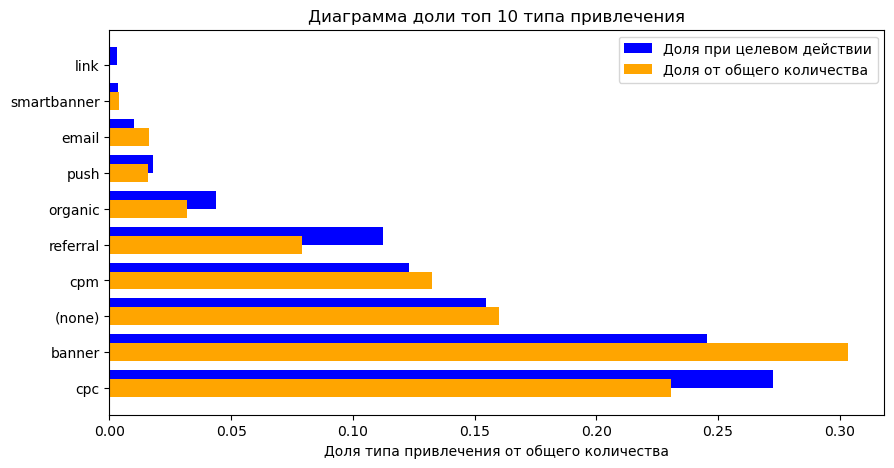

In [37]:
data = pd.merge(df_cr['utm_medium'].value_counts().iloc[:10] / df_cr.shape[0], 
                df['utm_medium'].value_counts() / df.shape[0], 
                how='left', left_index=True, right_index=True)

plt.figure(figsize=(10, 5))
plt.barh(data.index, data.count_x, 0.5, color='blue', align='edge')
plt.barh(data.index, data.count_y, 0.5, color='orange')
plt.title('Диаграмма доли топ 10 типа привлечения')
plt.xlabel('Доля типа привлечения от общего количества')
plt.legend(['Доля при целевом действии', 'Доля от общего количества'])
plt.show()

Несмотря на то, что в целом реклама в соц.сетях и органический трафик не оказывают влияние на целевую переменную, отдельные значения utm_source и utm_medium вносят заметный вклад в предсказание целевой переменной.  

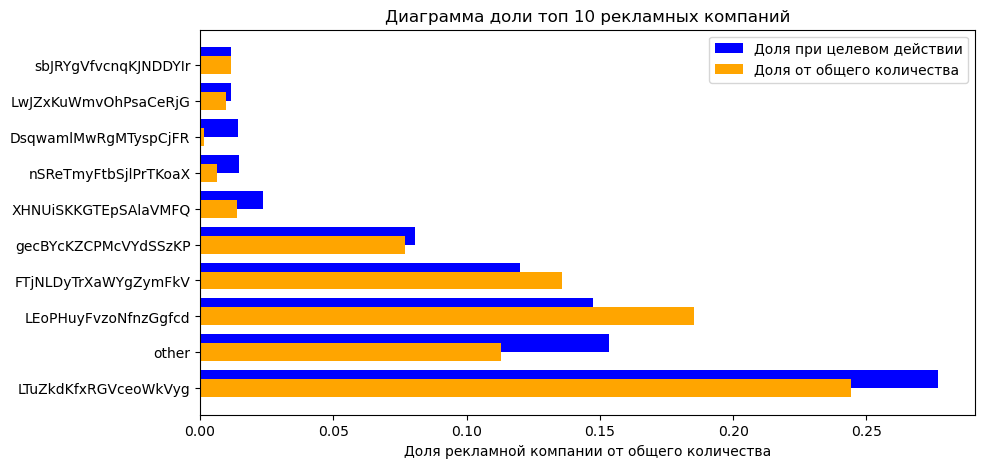

In [38]:
data = pd.merge(df_cr['utm_campaign'].value_counts().iloc[:10] / df_cr.shape[0], 
                df['utm_campaign'].value_counts() / df.shape[0], 
                how='left', left_index=True, right_index=True)

plt.figure(figsize=(10, 5))
plt.barh(data.index, data.count_x, 0.5, color='blue', align='edge')
plt.barh(data.index, data.count_y, 0.5, color='orange')
plt.title('Диаграмма доли топ 10 рекламных компаний')
plt.xlabel('Доля рекламной компании от общего количества')
plt.legend(['Доля при целевом действии', 'Доля от общего количества'])
plt.show()

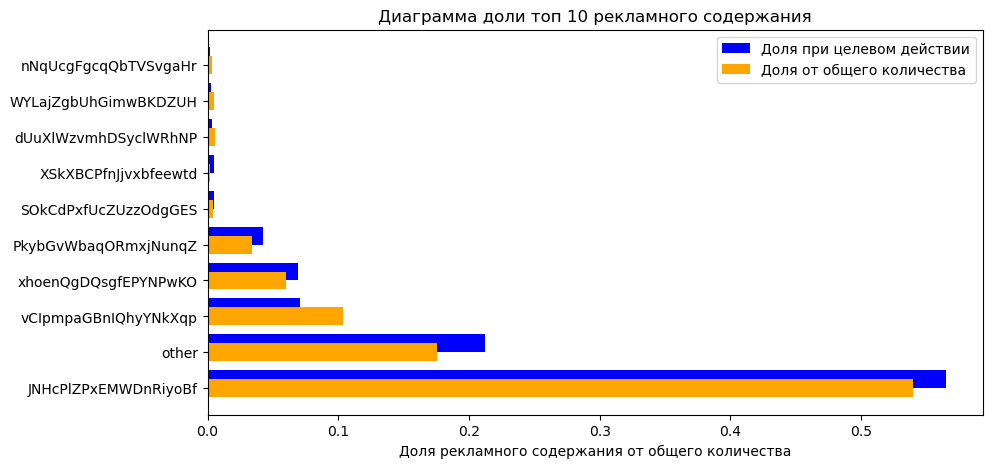

In [39]:
data = pd.merge(df_cr['utm_adcontent'].value_counts().iloc[:10] / df_cr.shape[0], 
                df['utm_adcontent'].value_counts() / df.shape[0], 
                how='left', left_index=True, right_index=True)

plt.figure(figsize=(10, 5))
plt.barh(data.index, data.count_x, 0.5, color='blue', align='edge')
plt.barh(data.index, data.count_y, 0.5, color='orange')
plt.title('Диаграмма доли топ 10 рекламного содержания')
plt.xlabel('Доля рекламного содержания от общего количества')
plt.legend(['Доля при целевом действии', 'Доля от общего количества'])
plt.show()

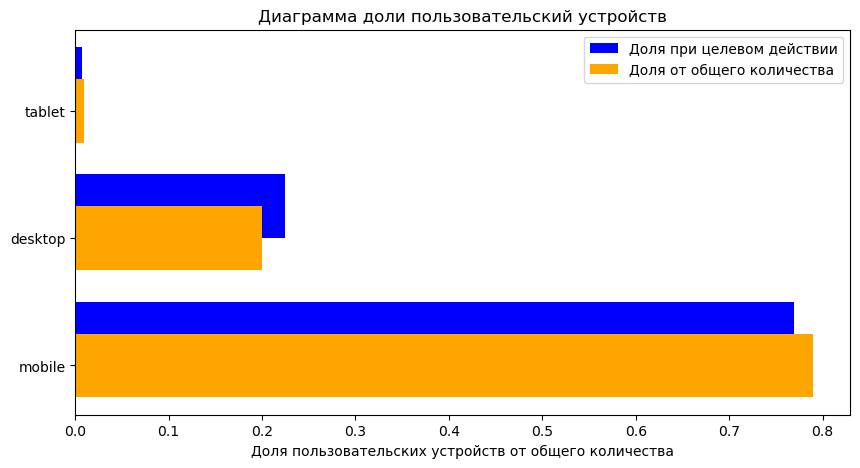

In [40]:
data = pd.merge(df_cr['device_category'].value_counts().iloc[:10] / df_cr.shape[0], 
                df['device_category'].value_counts() / df.shape[0], 
                how='left', left_index=True, right_index=True)

plt.figure(figsize=(10, 5))
plt.barh(data.index, data.count_x, 0.5, color='blue', align='edge')
plt.barh(data.index, data.count_y, 0.5, color='orange')
plt.title('Диаграмма доли пользовательский устройств')
plt.xlabel('Доля пользовательских устройств от общего количества')
plt.legend(['Доля при целевом действии', 'Доля от общего количества'])
plt.show()

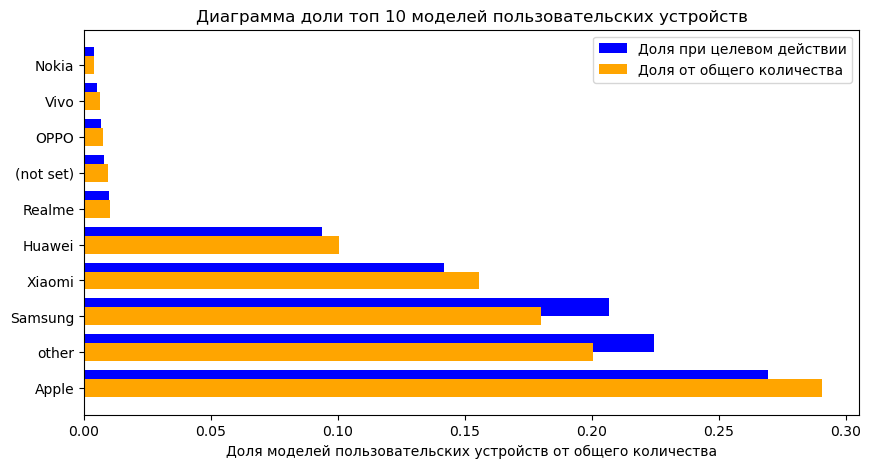

In [41]:
data = pd.merge(df_cr['device_brand'].value_counts().iloc[:10] / df_cr.shape[0], 
                df['device_brand'].value_counts() / df.shape[0], 
                how='left', left_index=True, right_index=True)

plt.figure(figsize=(10, 5))
plt.barh(data.index, data.count_x, 0.5, color='blue', align='edge')
plt.barh(data.index, data.count_y, 0.5, color='orange')
plt.title('Диаграмма доли топ 10 моделей пользовательских устройств')
plt.xlabel('Доля моделей пользовательских устройств от общего количества')
plt.legend(['Доля при целевом действии', 'Доля от общего количества'])
plt.show()

Отдельно отметим графики с переменными 'utm_campaign', 'utm_adcontent', 'device_brand', в которых пропуски заполняли константой. Из графиков видно, что в переменных 'utm_campaign', 'utm_adcontent' пропуски можно было бы заполнять модой, и это не повлияло бы на предсказание. А вот в переменной 'device_brand' замена на моду, вместо константы, привела бы к искажению предсказаний.

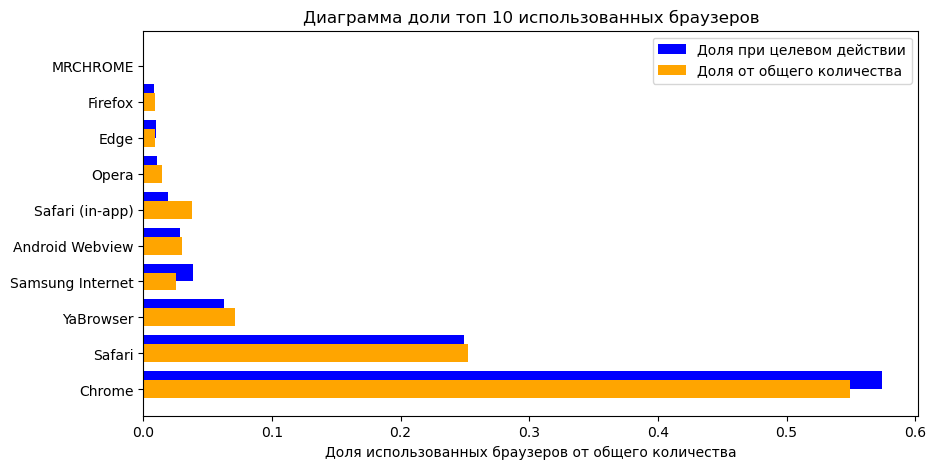

In [42]:
data = pd.merge(df_cr['device_browser'].value_counts().iloc[:10] / df_cr.shape[0], 
                df['device_browser'].value_counts() / df.shape[0], 
                how='left', left_index=True, right_index=True)

plt.figure(figsize=(10, 5))
plt.barh(data.index, data.count_x, 0.5, color='blue', align='edge')
plt.barh(data.index, data.count_y, 0.5, color='orange')
plt.title('Диаграмма доли топ 10 использованных браузеров')
plt.xlabel('Доля использованных браузеров от общего количества')
plt.legend(['Доля при целевом действии', 'Доля от общего количества'])
plt.show()

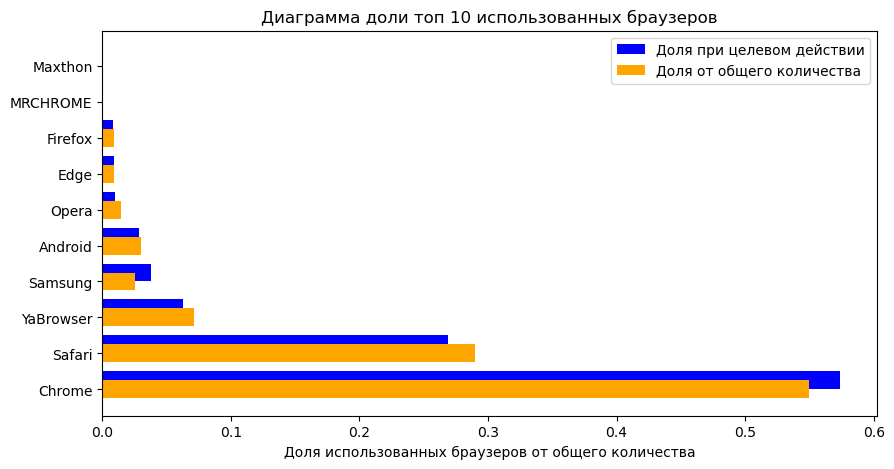

In [43]:
data = pd.merge(df_cr['device_browser_short'].value_counts().iloc[:10] / df_cr.shape[0], 
                df['device_browser_short'].value_counts() / df.shape[0], 
                how='left', left_index=True, right_index=True)

plt.figure(figsize=(10, 5))
plt.barh(data.index, data.count_x, 0.5, color='blue', align='edge')
plt.barh(data.index, data.count_y, 0.5, color='orange')
plt.title('Диаграмма доли топ 10 использованных браузеров')
plt.xlabel('Доля использованных браузеров от общего количества')
plt.legend(['Доля при целевом действии', 'Доля от общего количества'])
plt.show()

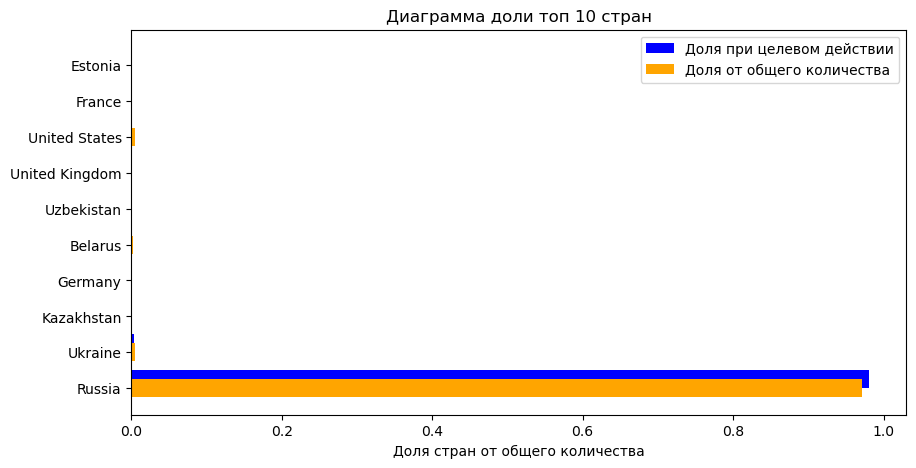

In [44]:
data = pd.merge(df_cr['geo_country'].value_counts().iloc[:10] / df_cr.shape[0], 
                df['geo_country'].value_counts() / df.shape[0], 
                how='left', left_index=True, right_index=True)

plt.figure(figsize=(10, 5))
plt.barh(data.index, data.count_x, 0.5, color='blue', align='edge')
plt.barh(data.index, data.count_y, 0.5, color='orange')
plt.title('Диаграмма доли топ 10 стран')
plt.xlabel('Доля стран от общего количества')
plt.legend(['Доля при целевом действии', 'Доля от общего количества'])
plt.show()

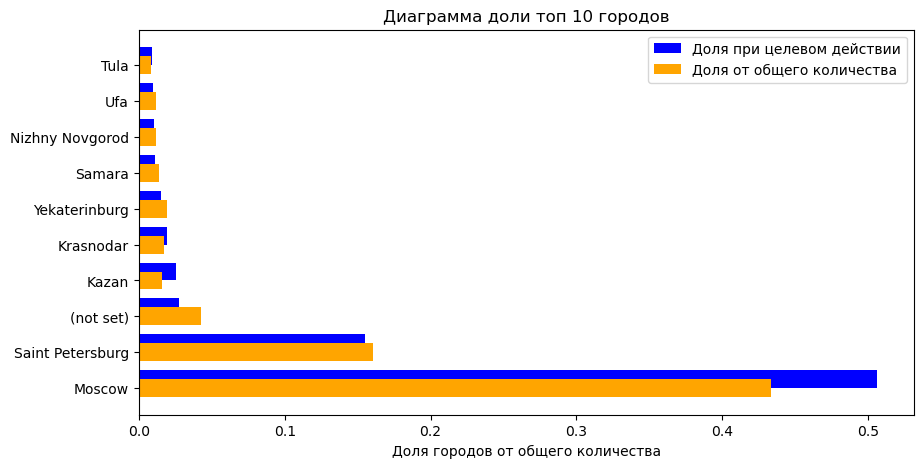

In [45]:
data = pd.merge(df_cr['geo_city'].value_counts().iloc[:10] / df_cr.shape[0], 
                df['geo_city'].value_counts() / df.shape[0], 
                how='left', left_index=True, right_index=True)

plt.figure(figsize=(10, 5))
plt.barh(data.index, data.count_x, 0.5, color='blue', align='edge')
plt.barh(data.index, data.count_y, 0.5, color='orange')
plt.title('Диаграмма доли топ 10 городов')
plt.xlabel('Доля городов от общего количества')
plt.legend(['Доля при целевом действии', 'Доля от общего количества'])
plt.show()

На основании описания переменных датасета и визуализаций сделали определенные выводы на основании которых удалим следующие фичи: 
    * которые не должны влиять на предсказание ('session_id', 'client_id', 'visit_number', 'device_screen_resolution', 'hit_date', 'hit_type', 'event_category', 'device_browser', 'device_browser_short', 'geo_country', 'visit_time').
    При этом при удалении некоторых фич принималось во внимание, что:
    *'hit_date' дублирует информацию переменной 'visit_date';
    * hit_type' принимает только одно значение;
    *'event_category' является более общим описанием целевой переменной;
    * 'device_browser', 'device_browser_short' браузер зависит от модели устройства.
    * 'geo_country' целевая аудитория только 1 страна Россия, поэтому в модели предсказаний данная фича не нужна.
    Также удалим созданные переменные utm_source_num, utm_medium_num, path_len, month и фичи из которых их создавали visit_date и hit_page_path.
    

In [46]:
columns_to_drop = [
    'session_id',
    'client_id', 
    'visit_time', 
    'visit_number',
    'device_screen_resolution', 
    'hit_date', 
    'hit_type', 
    'event_category',
    'utm_source_num',
    'utm_medium_num',
    'path_len',
    'device_browser',
    'visit_date',
    'hit_page_path',
    'month',
    'device_browser_short', 
    'geo_country'
]

df.drop(columns_to_drop, axis=1, inplace=True)

In [47]:
df.head()

,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,geo_city,hit_number,event_action,dayofweek,hour
0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,Zlatoust,3,0,2,14
1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Samsung,Moscow,3,0,6,8
2,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,Krasnoyarsk,10,0,1,2
3,kjsLglQLzykiRbcDiGcD,cpc,other,NOBKLgtuvqYWkXQHeYWM,mobile,Xiaomi,Moscow,2,0,5,5
4,kjsLglQLzykiRbcDiGcD,cpc,other,other,mobile,Xiaomi,Moscow,3,0,5,5


Проверим числовую переменную hit_number на выбросы и при необходимости скорректируем их.

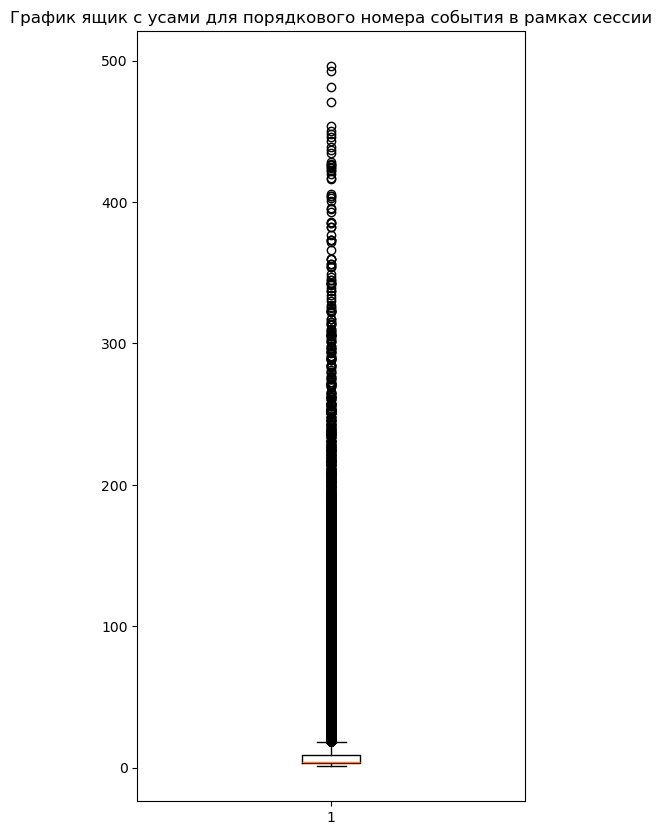

In [48]:
plt.figure(figsize=(5, 10))
plt.boxplot(df.hit_number)
plt.title('График ящик с усами для порядкового номера события в рамках сессии')
plt.show()

In [49]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

boundaries = calculate_outliers(df['hit_number'])
boundaries

(-6.0, 18.0)

In [50]:
df.loc[df['hit_number'] > boundaries[1], 'hit_number'] = round(boundaries[1])

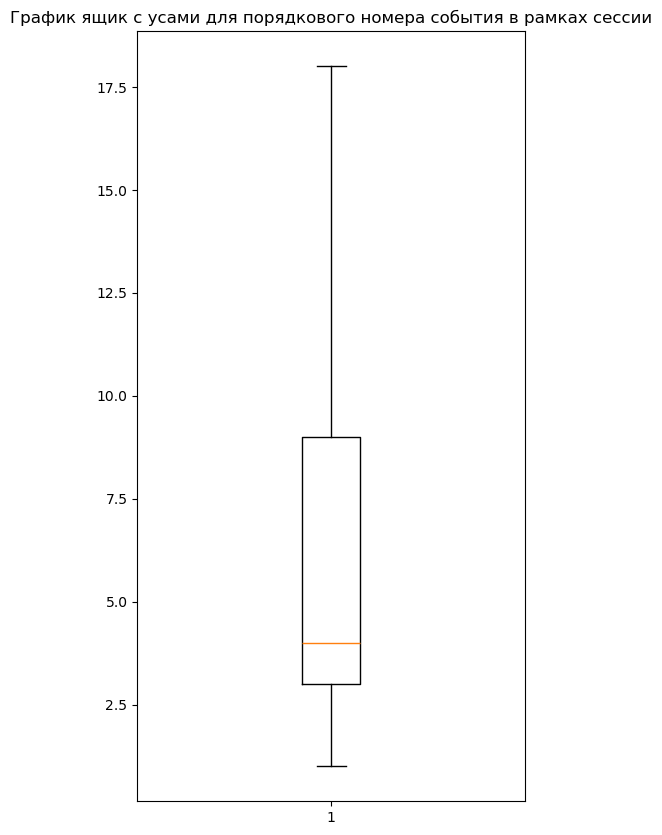

In [51]:
plt.figure(figsize=(5, 10))
plt.boxplot(df.hit_number)
plt.title('График ящик с усами для порядкового номера события в рамках сессии')
plt.show()

## 3. Feature engineering

С учетом того, что датасет не сбалансирован, сформируем датасет в который включим все значения с целевым действием и 10000 значений без целевого действия.

In [52]:
df_prepared = pd.concat([
    df[df['event_action'] == 1], 
    df[df['event_action'] == 0].sample(n=10000)
]).sample(frac=1)

df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15229 entries, 805124 to 312746
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   utm_source       15229 non-null  object
 1   utm_medium       15229 non-null  object
 2   utm_campaign     15229 non-null  object
 3   utm_adcontent    15229 non-null  object
 4   device_category  15229 non-null  object
 5   device_brand     15229 non-null  object
 6   geo_city         15229 non-null  object
 7   hit_number       15229 non-null  int64 
 8   event_action     15229 non-null  int64 
 9   dayofweek        15229 non-null  int32 
 10  hour             15229 non-null  int32 
dtypes: int32(2), int64(2), object(7)
memory usage: 1.3+ MB


In [53]:
df_prepared.shape

(15229, 11)

### 3.1. Подготовка переменных

#### 3.1.1. Преобразование категориальных переменных

Проведем преобразование категориальных переменных

In [54]:
columns_to_encode = [
    'utm_source', 
    'utm_medium', 
    'utm_campaign',
    'utm_adcontent',
    'device_category',
    'device_brand', 
    'geo_city'
]

ohe = OneHotEncoder(sparse_output=False)
ohe.fit(df_prepared[columns_to_encode])

OneHotEncoder(sparse_output=False)

In [55]:
df_prepared[ohe.get_feature_names_out()] = ohe.transform(df_prepared[columns_to_encode])
df_prepared.head()

C:\Users\Alex\AppData\Local\Temp\ipykernel_8960\2537333696.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_prepared[ohe.get_feature_names_out()] = ohe.transform(df_prepared[columns_to_encode])
C:\Users\Alex\AppData\Local\Temp\ipykernel_8960\2537333696.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_prepared[ohe.get_feature_names_out()] = ohe.transform(df_prepared[columns_to_encode])
C:\Users\Alex\AppData\Local\Temp\ipykernel_8960\2537333696.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually 

,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,geo_city,hit_number,event_action,dayofweek,...,geo_city_Yoshkar-Ola,geo_city_Yuzhno-Sakhalinsk,geo_city_Zagorjanskas,geo_city_Zagreb,geo_city_Zheleznodorozhny,geo_city_Zheleznogorsk,geo_city_Zhukovskiy,geo_city_Zlatoust,geo_city_Zvenigorod,geo_city_Хомутово
805124,BHcvLfOaCWvWTykYqHVe,cpc,other,other,desktop,other,Moscow,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1212398,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Xiaomi,Barnaul,3,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
585496,ZpYIoDJMcFzVoPFsHGJL,smartbanner,jqlUOdZBNZYfInQVcZlS,SAVVWaMghGnnvPOqMOIt,mobile,(not set),Saint Petersburg,3,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146089,MvfHsxITijuriZxsqZqt,cpv,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,mobile,Sony,Moscow,2,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
728017,ZpYIoDJMcFzVoPFsHGJL,banner,eimRuUrNhZLAYcwRrNXu,JNHcPlZPxEMWDnRiyoBf,mobile,Samsung,Saint Petersburg,2,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Удалим используемые в преобразовании категориальные фичи.

In [56]:
columns_to_encode = [
    'utm_source', 
    'utm_medium', 
    'utm_campaign',
    'utm_adcontent',
    'device_category',
    'device_brand', 
    'geo_city'
]

df_prepared.drop(columns_to_encode, axis=1, inplace=True)
df_prepared.head()

,hit_number,event_action,dayofweek,hour,utm_source_BHcvLfOaCWvWTykYqHVe,utm_source_BKeImrJuRDZcHiSSTdzm,utm_source_CFeqZLBNQdYHxJrTOHjY,utm_source_CgsxHpdTmXHvrHqEKRxp,utm_source_DnEUulZAecfGPvdtZBYS,utm_source_EvhrtRzIJnQYHziPiLzV,...,geo_city_Yoshkar-Ola,geo_city_Yuzhno-Sakhalinsk,geo_city_Zagorjanskas,geo_city_Zagreb,geo_city_Zheleznodorozhny,geo_city_Zheleznogorsk,geo_city_Zhukovskiy,geo_city_Zlatoust,geo_city_Zvenigorod,geo_city_Хомутово
805124,2,0,0,14,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1212398,3,0,3,12,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
585496,3,0,2,21,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146089,2,0,5,8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
728017,2,0,2,16,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 3.1.2. Преобразование числовых переменных

In [57]:
columns_to_scaler = [
    'hit_number',
    'dayofweek',
    'hour'
    ]

std = StandardScaler()
df_prepared[['hit_number_std', 'dayofweek_std', 'hour_std']] = std.fit_transform(df_prepared[columns_to_scaler])
df_prepared.head()

C:\Users\Alex\AppData\Local\Temp\ipykernel_8960\1621381396.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_prepared[['hit_number_std', 'dayofweek_std', 'hour_std']] = std.fit_transform(df_prepared[columns_to_scaler])
C:\Users\Alex\AppData\Local\Temp\ipykernel_8960\1621381396.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_prepared[['hit_number_std', 'dayofweek_std', 'hour_std']] = std.fit_transform(df_prepared[columns_to_scaler])
C:\Users\Alex\AppData\Local\Temp\ipykernel_8960\1621381396.py:8: PerformanceWarning: D

,hit_number,event_action,dayofweek,hour,utm_source_BHcvLfOaCWvWTykYqHVe,utm_source_BKeImrJuRDZcHiSSTdzm,utm_source_CFeqZLBNQdYHxJrTOHjY,utm_source_CgsxHpdTmXHvrHqEKRxp,utm_source_DnEUulZAecfGPvdtZBYS,utm_source_EvhrtRzIJnQYHziPiLzV,...,geo_city_Zagreb,geo_city_Zheleznodorozhny,geo_city_Zheleznogorsk,geo_city_Zhukovskiy,geo_city_Zlatoust,geo_city_Zvenigorod,geo_city_Хомутово,hit_number_std,dayofweek_std,hour_std
805124,2,0,0,14,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.914368,-1.403448,0.053192
1212398,3,0,3,12,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.742358,0.119794,-0.285111
585496,3,0,2,21,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.742358,-0.387954,1.237253
146089,2,0,5,8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.914368,1.135288,-0.961717
728017,2,0,2,16,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.914368,-0.387954,0.391495


Выведем матрицу корреляции для стандартизированных и первоначальных переменной

In [58]:
df_prepared[['hit_number', 'hit_number_std', 'dayofweek', 'dayofweek_std', 'hour', 'hour_std']].corr()

,hit_number,hit_number_std,dayofweek,dayofweek_std,hour,hour_std
hit_number,1.000000,1.000000,-0.002044,-0.002044,0.009500,0.009500
hit_number_std,1.000000,1.000000,-0.002044,-0.002044,0.009500,0.009500
dayofweek,-0.002044,-0.002044,1.000000,1.000000,-0.002407,-0.002407
dayofweek_std,-0.002044,-0.002044,1.000000,1.000000,-0.002407,-0.002407
hour,0.009500,0.009500,-0.002407,-0.002407,1.000000,1.000000
hour_std,0.009500,0.009500,-0.002407,-0.002407,1.000000,1.000000


Удалим используемые в преобразовании числовые фичи

In [59]:
columns_to_scaler = [
    'hit_number',
    'dayofweek',
    'hour'
    ]

df_prepared.drop(columns_to_scaler, axis=1, inplace=True)

In [60]:
df_prepared.shape

(15229, 867)

### 3.2. Сохранение полученного датасета

Сохраним полученный датасет в файл для этапа моделирования.

In [ ]:
df_prepared.to_csv('data/df_prepared.csv', index=False)

## 4. Modelling

In [ ]:
df_prepared = pd.read_csv('data/df_prepared.csv')
df_prepared.info()

In [61]:
df_prepared.head()

,event_action,utm_source_BHcvLfOaCWvWTykYqHVe,utm_source_BKeImrJuRDZcHiSSTdzm,utm_source_CFeqZLBNQdYHxJrTOHjY,utm_source_CgsxHpdTmXHvrHqEKRxp,utm_source_DnEUulZAecfGPvdtZBYS,utm_source_EvhrtRzIJnQYHziPiLzV,utm_source_FTAuYVNoYYxgvKMpKSLW,utm_source_GmILPdZyuAVJCPsUBHeN,utm_source_GpAkIXsclxDGyILfNlrR,...,geo_city_Zagreb,geo_city_Zheleznodorozhny,geo_city_Zheleznogorsk,geo_city_Zhukovskiy,geo_city_Zlatoust,geo_city_Zvenigorod,geo_city_Хомутово,hit_number_std,dayofweek_std,hour_std
805124,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.914368,-1.403448,0.053192
1212398,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.742358,0.119794,-0.285111
585496,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.742358,-0.387954,1.237253
146089,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.914368,1.135288,-0.961717
728017,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.914368,-0.387954,0.391495


In [62]:
X = df_prepared.drop(['event_action'], axis=1)
y = df_prepared.event_action

In [63]:
models = [
    LogisticRegression(solver='liblinear'),
    RandomForestClassifier(),
    MLPClassifier(max_iter=500, hidden_layer_sizes=(100, 20))
]

best_ROC_AUC = .0
best_model = None
for m in models:
    score = cross_val_score(m, X, y, scoring=make_scorer(roc_auc_score), cv=5)
    print(f'model: {type(m).__name__}, ROC_AUC_mean: {score.mean():.4f}, ROC_AUC_std: {score.std():.4f}')
    
    if score.mean() > best_ROC_AUC:
        best_ROC_AUC = score.mean()
        best_model = m

print(f'best model: {type(best_model).__name__}, ROC_AUC: {best_ROC_AUC:.4f}')

model: LogisticRegression, ROC_AUC_mean: 0.5759, ROC_AUC_std: 0.0039
model: RandomForestClassifier, ROC_AUC_mean: 0.6746, ROC_AUC_std: 0.0057
model: MLPClassifier, ROC_AUC_mean: 0.6576, ROC_AUC_std: 0.0149
best model: RandomForestClassifier, ROC_AUC: 0.6746


По результатам кросс-валидации лучшей моделью является Случайный лес.
Значение метрики ROC_AUC лучшей модели составляет 67 %, что немного лучше ориентировочного значения ROC-AUC ~ 0.65.

Обучим нашу модель и посмотрим какие 10 фичей вносят наибольший вклад в предсказание целевого действия.

In [64]:
best_model.fit(X, y)

RandomForestClassifier()

In [65]:
f_importance = pd.DataFrame({'Feature': X.columns, 'Coef': best_model.feature_importances_})
f_importance.sort_values('Coef', ascending=False).head(10)

,Feature,Coef
863,hit_number_std,0.282331
865,hour_std,0.185708
864,dayofweek_std,0.111600
659,geo_city_Moscow,0.015414
739,geo_city_Saint Petersburg,0.012505
398,device_brand_Apple,0.011768
435,device_brand_Samsung,0.011581
447,device_brand_Xiaomi,0.010381
415,device_brand_Huawei,0.009094
394,device_category_mobile,0.006821
